In [244]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier

In [102]:
# Load the datasets
world_cup_players_info = pd.read_csv('world_cup_players_info.csv')
points_table = pd.read_csv('points_table.csv')
matches = pd.read_csv('matches.csv')
match_schedule_results = pd.read_csv('match_schedule_results.csv')
bowling_summary = pd.read_csv('bowling_summary.csv')
batting_summary = pd.read_csv('batting_summary.csv')
deliveries = pd.read_csv('deliveries.csv')

In [103]:
# Display the first few rows of each dataset to understand their structure
datasets_info = {
    "world_cup_players_info": world_cup_players_info.head(),
    "points_table": points_table.head(),
    "matches": matches.head(),
    "match_schedule_results": match_schedule_results.head(),
    "bowling_summary": bowling_summary.head(),
    "batting_summary": batting_summary.head(),
    "deliveries": deliveries.head()
}
datasets_info

{'world_cup_players_info':        player_name    team_name image_of_player    battingStyle  \
 0   Jonny Bairstow      England                  Right-hand bat   
 1         Joe Root      England                  Right hand Bat   
 2      Jos Buttler      England                  Right hand Bat   
 3       Will Young  New Zealand                  Right hand Bat   
 4  Rachin Ravindra  New Zealand                   Left hand Bat   
 
              bowlingStyle          playingRole  \
 0   Right-arm fast-medium  Wicketkeeper Batter   
 1      Right arm Offbreak     Top order Batter   
 2                          Wicketkeeper Batter   
 3      Right arm Offbreak     Top order Batter   
 4  Slow Left arm Orthodox     Top order Batter   
 
                                          description  
 0  Jonny Bairstow is an English cricketer known f...  
 1  Joe Root is an English cricketer known for his...  
 2  Jos Buttler is an English cricketer known for ...  
 3  Will Young is a New Zealand 

In [104]:
# Check for missing values in each dataset
missing_values = {
    "world_cup_players_info": world_cup_players_info.isnull().sum(),
    "points_table": points_table.isnull().sum(),
    "matches": matches.isnull().sum(),
    "match_schedule_results": match_schedule_results.isnull().sum(),
    "bowling_summary": bowling_summary.isnull().sum(),
    "batting_summary": batting_summary.isnull().sum(),
    "deliveries": deliveries.isnull().sum()
}

missing_values

{'world_cup_players_info': player_name         0
 team_name           0
 image_of_player    66
 battingStyle        0
 bowlingStyle        6
 playingRole         0
 description        17
 dtype: int64,
 'points_table': Ranking         0
 Team            0
 Matches         0
 Won             0
 Lost            0
 Tie             0
 No Results      0
 Points          0
 Net Run Rate    0
 For             0
 Against         0
 dtype: int64,
 'matches': season              0
 team1               0
 team2               0
 date                0
 match_number        0
 venue               0
 city                0
 toss_winner         0
 toss_decision       0
 player_of_match     0
 umpire1             0
 umpire2             0
 reserve_umpire      1
 match_referee       0
 winner              0
 winner_runs        24
 winner_wickets     24
 match_type          0
 dtype: int64,
 'match_schedule_results': Match_no         0
 Date             0
 Venue            0
 Team1            0
 Team2      

In [105]:
# World Cup Players Info
world_cup_players_info['image_of_player'].fillna('No image available', inplace=True)
world_cup_players_info['bowlingStyle'].fillna('Unknown', inplace=True)
world_cup_players_info['description'].fillna('No description available', inplace=True)

# Matches
matches['reserve_umpire'].fillna('Unknown', inplace=True)
matches['winner_runs'].fillna(0, inplace=True)  # Assuming 0 if not available
matches['winner_wickets'].fillna(0, inplace=True)  # Assuming 0 if not available

# Batting Summary
batting_summary['Dismissal'].fillna('Not Dismissed', inplace=True)

# Deliveries
deliveries['wides'].fillna(0, inplace=True)
deliveries['noballs'].fillna(0, inplace=True)
deliveries['byes'].fillna(0, inplace=True)
deliveries['legbyes'].fillna(0, inplace=True)
deliveries['penalty'].fillna(0, inplace=True)
deliveries['wicket_type'].fillna('None', inplace=True)
deliveries['player_dismissed'].fillna('None', inplace=True)
deliveries['other_wicket_type'].fillna('Not Applicable', inplace=True)
deliveries['other_player_dismissed'].fillna('Not Applicable', inplace=True)


# Confirm missing values have been handled
missing_values_after_cleaning = {
    "world_cup_players_info": world_cup_players_info.isnull().sum(),
    "points_table": points_table.isnull().sum(),
    "matches": matches.isnull().sum(),
    "match_schedule_results": match_schedule_results.isnull().sum(),
    "bowling_summary": bowling_summary.isnull().sum(),
    "batting_summary": batting_summary.isnull().sum(),
    "deliveries": deliveries.isnull().sum()
}

missing_values_after_cleaning

{'world_cup_players_info': player_name        0
 team_name          0
 image_of_player    0
 battingStyle       0
 bowlingStyle       0
 playingRole        0
 description        0
 dtype: int64,
 'points_table': Ranking         0
 Team            0
 Matches         0
 Won             0
 Lost            0
 Tie             0
 No Results      0
 Points          0
 Net Run Rate    0
 For             0
 Against         0
 dtype: int64,
 'matches': season             0
 team1              0
 team2              0
 date               0
 match_number       0
 venue              0
 city               0
 toss_winner        0
 toss_decision      0
 player_of_match    0
 umpire1            0
 umpire2            0
 reserve_umpire     0
 match_referee      0
 winner             0
 winner_runs        0
 winner_wickets     0
 match_type         0
 dtype: int64,
 'match_schedule_results': Match_no         0
 Date             0
 Venue            0
 Team1            0
 Team2            0
 Winner          

In [106]:
world_cup_players_info.drop(columns=['image_of_player'], inplace=True)

In [107]:
# Remove duplicates from each dataset
world_cup_players_info.drop_duplicates(inplace=True)
points_table.drop_duplicates(inplace=True)
matches.drop_duplicates(inplace=True)
match_schedule_results.drop_duplicates(inplace=True)
bowling_summary.drop_duplicates(inplace=True)
batting_summary.drop_duplicates(inplace=True)
deliveries.drop_duplicates(inplace=True)


# Confirm duplicates have been removed
duplicates_info = {
    "world_cup_players_info": world_cup_players_info.duplicated().sum(),
    "points_table": points_table.duplicated().sum(),
    "matches": matches.duplicated().sum(),
    "match_schedule_results": match_schedule_results.duplicated().sum(),
    "bowling_summary": bowling_summary.duplicated().sum(),
    "batting_summary": batting_summary.duplicated().sum(),
    "deliveries": deliveries.duplicated().sum()
}

duplicates_info

{'world_cup_players_info': 0,
 'points_table': 0,
 'matches': 0,
 'match_schedule_results': 0,
 'bowling_summary': 0,
 'batting_summary': 0,
 'deliveries': 0}

In [108]:
# Display the first few rows of each dataset to understand their structure
datasets_info = {
    "world_cup_players_info": world_cup_players_info.head(),
    "points_table": points_table.head(),
    "matches": matches.head(),
    "match_schedule_results": match_schedule_results.head(),
    "bowling_summary": bowling_summary.head(),
    "batting_summary": batting_summary.head(),
    "deliveries": deliveries.head()
}
datasets_info

{'world_cup_players_info':        player_name    team_name    battingStyle            bowlingStyle  \
 0   Jonny Bairstow      England  Right-hand bat   Right-arm fast-medium   
 1         Joe Root      England  Right hand Bat      Right arm Offbreak   
 2      Jos Buttler      England  Right hand Bat                           
 3       Will Young  New Zealand  Right hand Bat      Right arm Offbreak   
 4  Rachin Ravindra  New Zealand   Left hand Bat  Slow Left arm Orthodox   
 
            playingRole                                        description  
 0  Wicketkeeper Batter  Jonny Bairstow is an English cricketer known f...  
 1     Top order Batter  Joe Root is an English cricketer known for his...  
 2  Wicketkeeper Batter  Jos Buttler is an English cricketer known for ...  
 3     Top order Batter  Will Young is a New Zealand cricketer known fo...  
 4     Top order Batter  Rachin Ravindra is a New Zealand cricketer kno...  ,
 'points_table':    Ranking          Team  Matches  W

In [109]:
# Define the team name mapping dictionary
team_name_mapping = {
    'England': 'England',
    'New Zealand': 'New Zealand',
    'India': 'India',
    'South Africa': 'South Africa',
    'Australia': 'Australia',
    'Pakistan': 'Pakistan',
    'Sri Lanka': 'Sri Lanka',
    'Bangladesh': 'Bangladesh',
    'West Indies': 'West Indies',
    'Afghanistan': 'Afghanistan',
    'Zimbabwe': 'Zimbabwe',
    'Ireland': 'Ireland',
    'Netherlands': 'Netherlands'
}

# Function to standardize team names
def standardize_team_names(df, column_name, mapping):
    df[column_name] = df[column_name].map(mapping).fillna(df[column_name])
    return df

# Load your datasets
world_cup_players_info = pd.read_csv('world_cup_players_info.csv')
points_table = pd.read_csv('points_table.csv')
matches = pd.read_csv('matches.csv')
match_schedule_results = pd.read_csv('match_schedule_results.csv')
bowling_summary = pd.read_csv('bowling_summary.csv')
batting_summary = pd.read_csv('batting_summary.csv')
deliveries = pd.read_csv('deliveries.csv')

# Apply the standardization function to each relevant dataset
world_cup_players_info = standardize_team_names(world_cup_players_info, 'team_name', team_name_mapping)
points_table = standardize_team_names(points_table, 'Team', team_name_mapping)
matches = standardize_team_names(matches, 'team1', team_name_mapping)
matches = standardize_team_names(matches, 'team2', team_name_mapping)
match_schedule_results = standardize_team_names(match_schedule_results, 'Team1', team_name_mapping)
match_schedule_results = standardize_team_names(match_schedule_results, 'Team2', team_name_mapping)
bowling_summary = standardize_team_names(bowling_summary, 'Bowling_Team', team_name_mapping)
batting_summary = standardize_team_names(batting_summary, 'Team_Innings', team_name_mapping)
deliveries = standardize_team_names(deliveries, 'batting_team', team_name_mapping)
deliveries = standardize_team_names(deliveries, 'bowling_team', team_name_mapping)

# Save the cleaned datasets
world_cup_players_info.to_csv('cleaned_world_cup_players_info.csv', index=False)
points_table.to_csv('cleaned_points_table.csv', index=False)
matches.to_csv('cleaned_matches.csv', index=False)
match_schedule_results.to_csv('cleaned_match_schedule_results.csv', index=False)
bowling_summary.to_csv('cleaned_bowling_summary.csv', index=False)
batting_summary.to_csv('cleaned_batting_summary.csv', index=False)
deliveries.to_csv('cleaned_deliveries.csv', index=False)

In [110]:
# Verify the results by checking the unique team names again
standardized_team_names = {
    "world_cup_players_info": world_cup_players_info['team_name'].unique(),
    "points_table": points_table['Team'].unique(),
    "matches_team1": matches['team1'].unique(),
    "matches_team2": matches['team2'].unique(),
    "match_schedule_results_team1": match_schedule_results['Team1'].unique(),
    "match_schedule_results_team2": match_schedule_results['Team2'].unique(),
    "bowling_summary": bowling_summary['Bowling_Team'].unique(),
    "batting_summary": batting_summary['Team_Innings'].unique(),
    "deliveries_batting_team": deliveries['batting_team'].unique(),
    "deliveries_bowling_team": deliveries['bowling_team'].unique()
}

standardized_team_names

{'world_cup_players_info': array(['England', 'New Zealand', 'Pakistan', ' ', 'Afghanistan',
        'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India',
        'Netherlands'], dtype=object),
 'points_table': array(['India', 'South Africa', 'Australia', 'New Zealand', 'Pakistan',
        'Afghanistan', 'England', 'Bangladesh', 'Sri Lanka', 'Netherlands'],
       dtype=object),
 'matches_team1': array(['England', 'Pakistan', 'Afghanistan', 'South Africa', 'Australia',
        'New Zealand', 'Sri Lanka', 'Bangladesh', 'Netherlands', 'India'],
       dtype=object),
 'matches_team2': array(['New Zealand', 'Netherlands', 'Bangladesh', 'Sri Lanka', 'India',
        'Pakistan', 'Australia', 'England', 'South Africa', 'Afghanistan'],
       dtype=object),
 'match_schedule_results_team1': array(['England ', 'Pakistan ', 'Bangladesh ', 'South Africa ', 'India ',
        'New Zealand ', 'Australia ', 'Netherlands ', 'Afghanistan ',
        'India'], dtype=object),
 'match_schedule_res

In [111]:
# Remove rows with ' ' as team name from the world_cup_players_info dataframe
world_cup_players_info = world_cup_players_info[world_cup_players_info['team_name'] != ' ']

# Verify the result by checking unique team names again
unique_team_names_wc_players = world_cup_players_info['team_name'].unique()
unique_team_names_wc_players

array(['England', 'New Zealand', 'Pakistan', 'Afghanistan', 'Bangladesh',
       'South Africa', 'Sri Lanka', 'Australia', 'India', 'Netherlands'],
      dtype=object)

In [112]:
# Save the cleaned datasets
world_cup_players_info.to_csv('cleaned_world_cup_players_info.csv', index=False)
points_table.to_csv('cleaned_points_table.csv', index=False)
matches.to_csv('cleaned_matches.csv', index=False)
match_schedule_results.to_csv('cleaned_match_schedule_results.csv', index=False)
bowling_summary.to_csv('cleaned_bowling_summary.csv', index=False)
batting_summary.to_csv('cleaned_batting_summary.csv', index=False)
deliveries.to_csv('cleaned_deliveries.csv', index=False)

In [113]:
# Verify the results by checking the unique team names again
standardized_team_names = {
    "world_cup_players_info": world_cup_players_info['team_name'].unique(),
    "points_table": points_table['Team'].unique(),
    "matches_team1": matches['team1'].unique(),
    "matches_team2": matches['team2'].unique(),
    "match_schedule_results_team1": match_schedule_results['Team1'].unique(),
    "match_schedule_results_team2": match_schedule_results['Team2'].unique(),
    "bowling_summary": bowling_summary['Bowling_Team'].unique(),
    "batting_summary": batting_summary['Team_Innings'].unique(),
    "deliveries_batting_team": deliveries['batting_team'].unique(),
    "deliveries_bowling_team": deliveries['bowling_team'].unique()
}

standardized_team_names

{'world_cup_players_info': array(['England', 'New Zealand', 'Pakistan', 'Afghanistan', 'Bangladesh',
        'South Africa', 'Sri Lanka', 'Australia', 'India', 'Netherlands'],
       dtype=object),
 'points_table': array(['India', 'South Africa', 'Australia', 'New Zealand', 'Pakistan',
        'Afghanistan', 'England', 'Bangladesh', 'Sri Lanka', 'Netherlands'],
       dtype=object),
 'matches_team1': array(['England', 'Pakistan', 'Afghanistan', 'South Africa', 'Australia',
        'New Zealand', 'Sri Lanka', 'Bangladesh', 'Netherlands', 'India'],
       dtype=object),
 'matches_team2': array(['New Zealand', 'Netherlands', 'Bangladesh', 'Sri Lanka', 'India',
        'Pakistan', 'Australia', 'England', 'South Africa', 'Afghanistan'],
       dtype=object),
 'match_schedule_results_team1': array(['England ', 'Pakistan ', 'Bangladesh ', 'South Africa ', 'India ',
        'New Zealand ', 'Australia ', 'Netherlands ', 'Afghanistan ',
        'India'], dtype=object),
 'match_schedule_results_t

In [196]:
# Load your cleaned datasets
world_cup_players_info = pd.read_csv('cleaned_world_cup_players_info.csv')
points_table = pd.read_csv('cleaned_points_table.csv')
matches = pd.read_csv('cleaned_matches.csv')
match_schedule_results = pd.read_csv('cleaned_match_schedule_results.csv')
bowling_summary = pd.read_csv('cleaned_bowling_summary.csv')
batting_summary = pd.read_csv('cleaned_batting_summary.csv')
deliveries = pd.read_csv('cleaned_deliveries.csv')
print(points_table['Team'])

0           India
1    South Africa
2       Australia
3     New Zealand
4        Pakistan
5     Afghanistan
6         England
7      Bangladesh
8       Sri Lanka
9     Netherlands
Name: Team, dtype: object


In [159]:
# Display basic statistics for numerical columns
print(world_cup_players_info.describe())
print(points_table.describe())
print(matches.describe())
print(match_schedule_results.describe())
print(bowling_summary.describe())
print(batting_summary.describe())
print(deliveries.describe())

# Display basic statistics for categorical columns
print(world_cup_players_info.describe(include=['O']))
print(points_table.describe(include=['O']))
print(matches.describe(include=['O']))
print(match_schedule_results.describe(include=['O']))
print(bowling_summary.describe(include=['O']))
print(batting_summary.describe(include=['O']))
print(deliveries.describe(include=['O']))

        player_name   team_name image_of_player    battingStyle  \
count           139         139              73             139   
unique          139          10              17               3   
top     Rahmat Shah  Bangladesh                  Right hand Bat   
freq              1          15              57              90   

              bowlingStyle playingRole  \
count                  133         139   
unique                  18           9   
top     Right arm Offbreak      Bowler   
freq                    32          46   

                                              description  
count                                                 122  
unique                                                122  
top     Temba Bavuma is a South African cricketer know...  
freq                                                    1  
        Ranking  Matches        Won       Lost   Tie  No Results     Points  \
count  10.00000     10.0  10.000000  10.000000  10.0        10.0  10.00000

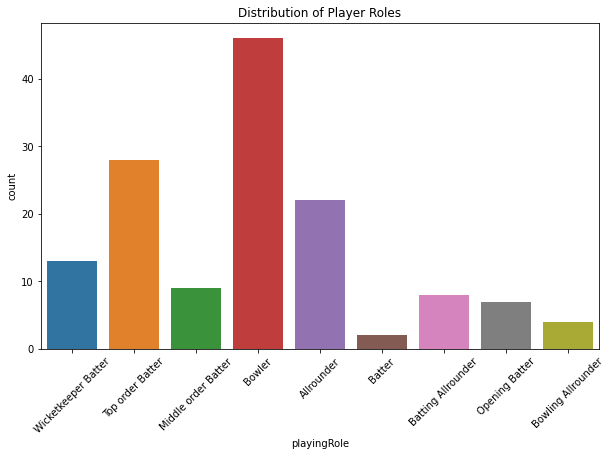

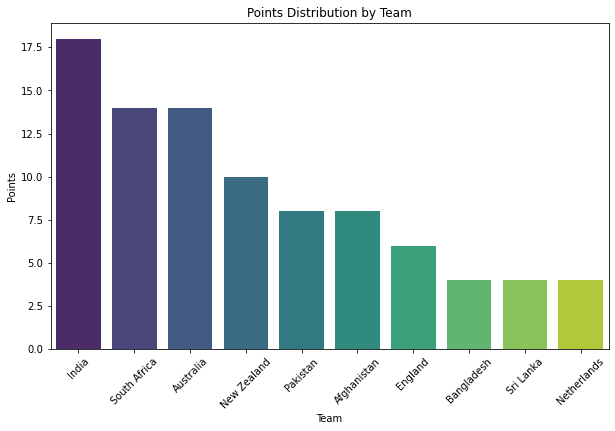

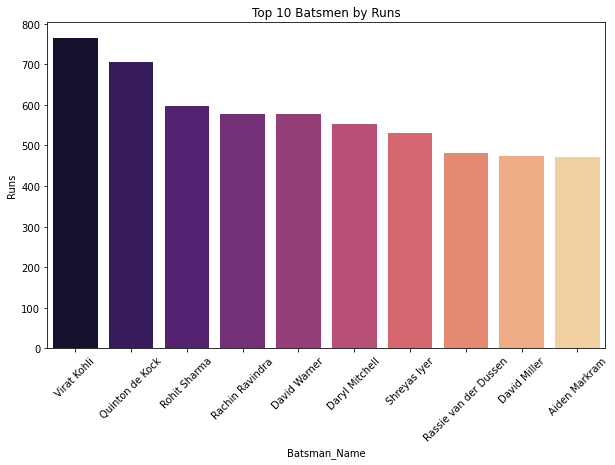

In [160]:
# Distribution of player roles in the World Cup Players Info dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=world_cup_players_info, x='playingRole')
plt.title('Distribution of Player Roles')
plt.xticks(rotation=45)
plt.show()

# Points distribution in the Points Table
plt.figure(figsize=(10, 6))
sns.barplot(data=points_table, x='Team', y='Points', palette='viridis')
plt.title('Points Distribution by Team')
plt.xticks(rotation=45)
plt.show()

# Top batsmen by runs in Batting Summary
top_batsmen = batting_summary.groupby('Batsman_Name')['Runs'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_batsmen, x='Batsman_Name', y='Runs', palette='magma')
plt.title('Top 10 Batsmen by Runs')
plt.xticks(rotation=45)
plt.show()

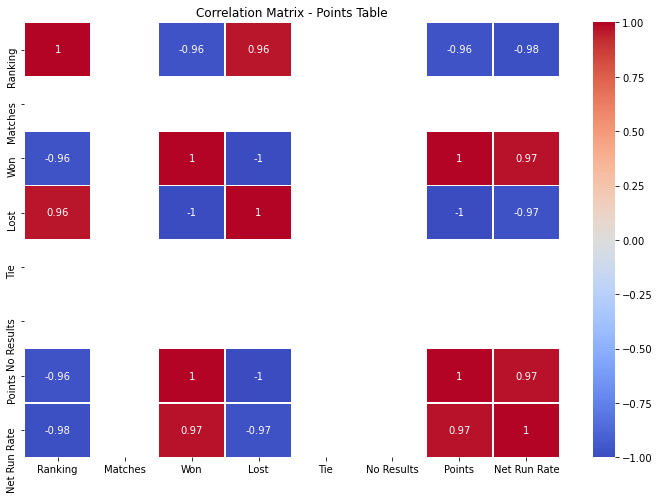

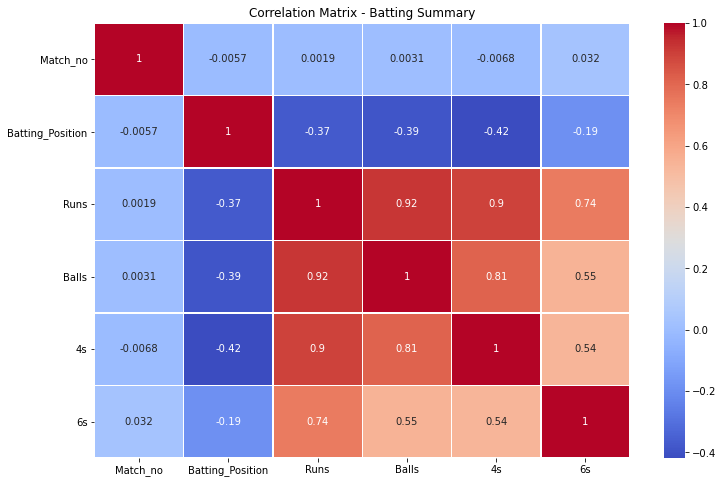

In [161]:
# Correlation matrix for Points Table
plt.figure(figsize=(12, 8))
sns.heatmap(points_table.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Points Table')
plt.show()

# Correlation matrix for Batting Summary
plt.figure(figsize=(12, 8))
sns.heatmap(batting_summary.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Batting Summary')
plt.show()

In [270]:
#Creating a model that decides batting position for a batsman

# Load the dataset
file_path = 'Merged_Batting_Summary_with_Player_Info.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Batsman_Name,Runs,Balls,4s,6s,Strike_Rate,battingStyle,playingRole,Batting_Order,Range
0,Jonny Bairstow,33,35,4,1,94.3,Right hand Bat,Wicketkeeper Batter,1,1
1,Dawid Malan,14,24,2,0,58.3,Left hand Bat,Top order Batter,2,"1,2,3"
2,Joe Root,77,86,4,1,89.5,Right hand Bat,Top order Batter,3,"2,3,4"
3,Harry Brook,25,16,4,1,156.3,Right hand Bat,Batter,4,"3,4,5"
4,Moeen Ali,11,17,1,0,64.7,Left hand Bat,Batting Allrounder,5,"4,5,6"


In [277]:
#Define the LabelEncoders and proceed with encoding
le_playingRole = LabelEncoder()

#Encode categorical variables
data['playingRole'] = le_playingRole.fit_transform(data['playingRole'])

# Extract feature set and target variable
X = data[['4s','6s','Strike_Rate', 'playingRole']]
y = data['Batting_Order']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.38372093023255816

In [281]:
# Function to check if predicted order falls within the specified range
def is_within_range(pred, actual_range):
    ranges = list(map(int, actual_range.split(',')))
    return pred in ranges

# Apply the function to evaluate model predictions
data_test = X_test.copy()
data_test['Actual_Range'] = data.loc[y_test.index, 'Range']
data_test['Predicted_Order'] = y_pred

data_test['Within_Range'] = data_test.apply(lambda row: is_within_range(row['Predicted_Order'], row['Actual_Range']), axis=1)

# Calculate the percentage of predictions falling within the specified range
within_range_accuracy = data_test['Within_Range'].mean()

print("Accuracy with which order is predicted within the correct range:", within_range_accuracy)

Accuracy with which order is predicted within the correct range: 0.6337209302325582
